# lasso Regularization

Lasso regularization, also known as L1 regularization, is a technique used to prevent overfitting in machine learning models. It does this by adding a penalty to the model's objective function that is proportional to the sum of the absolute values of the model coefficients. This penalty encourages the model coefficients to be smaller, which reduces the complexity of the model and makes it less likely to overfit the training data.

Here is an analogy to help you understand lasso regularization. Imagine you are trying to build a model to predict the price of a house. You have a dataset of houses with their prices and other features, such as the number of bedrooms, the square footage, and the location. You could build a very complex model that takes into account all of these features. However, this model would be likely to overfit the training data and not generalize well to new data. Lasso regularization would help to prevent this by encouraging the model to use simpler models that are less likely to overfit.

Lasso adds a special term to the model's learning process. This term penalizes the model if it assigns large values to some features while encouraging other features to have zero values. In simpler terms, it forces the model to focus on the most important features while completely ignoring some of the less important ones.

## Advantages
1. Simplicity: Lasso makes your model simpler by setting some feature coefficients to exactly zero. This results in a more interpretable model with fewer variables to consider.
2. Feature Selection: It automatically performs feature selection, which can be beneficial when you have many features, and not all of them are relevant for making predictions.
3. Preventing Overfitting: Lasso helps prevent overfitting by controlling the complexity of the model, ensuring it doesn't get too carried away with the training data.
4. It can help to prevent overfitting.
5. It can improve the generalization performance of the model.
6. It can make the model more interpretable.
7. It can select features, which means that it can identify the features that are most important for predicting the target variable.

## Disadvantages

1. Hyperparameter Tuning: Similar to Ridge Regularization, Lasso also has a hyperparameter that needs tuning to find the right balance between simplicity and accuracy.
2. May Remove Potentially Useful Features: Lasso can be too aggressive in setting coefficients to zero, potentially removing features that could still be useful for prediction.
3. It can reduce the accuracy of the model on the training data.
4. It can be computationally expensive to train the model.
5. It can be more sensitive to the choice of hyperparameters.


## Applications/Uses

1. Predicting House Prices: Like in our analogy, it's handy for predicting house prices based on various features.
2. Genomics: In genetics, Lasso helps identify which genes are crucial for predicting diseases.
3. Finance: It's used in portfolio optimization to select the most valuable assets.
4. Text Analysis: In natural language processing, Lasso can be used for text classification and sentiment analysis.

In summary, Lasso Regularization is like a savvy detective that helps your machine learning model focus on the most important clues (features) while ignoring the less relevant ones. It's a useful tool in preventing overfitting and simplifying models, with applications in various domains where feature selection and model simplicity are critical.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

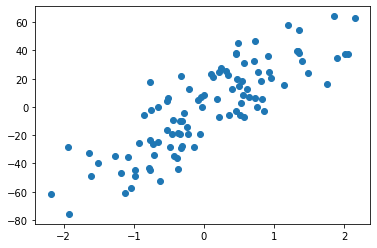

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.scatter(X,y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[27.76520354]
-2.610756896437568


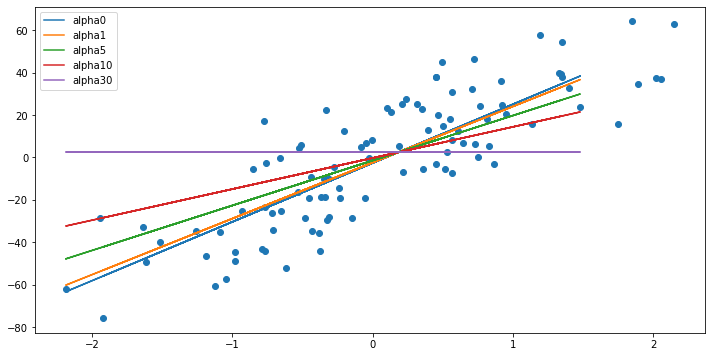

In [9]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train, y_train)
    plt.plot(X_test, L.predict(X_test), label = "alpha{}".format(i))
plt.legend()
plt.show()
    

# Working of lasso using polynomial regression

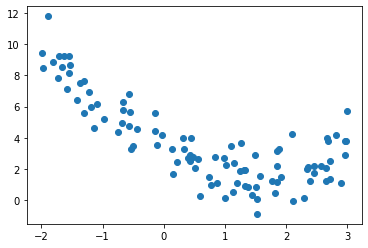

In [13]:
m = 100
x1 = 5*np.random.rand(m,1) -2
x2 = 0.7*x1**2 -2 *x1+3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

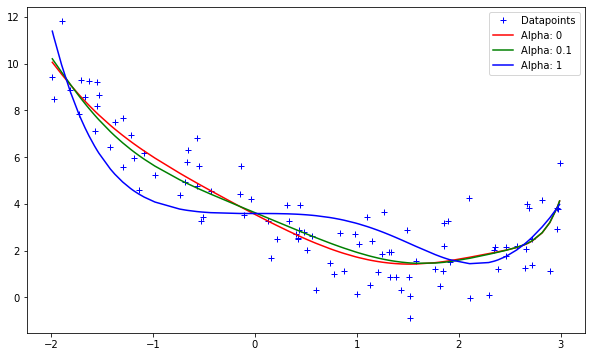

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()